# Customer Churn Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px

#importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as lm
from sklearn import metrics

In [2]:
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning

#### Dropping unnecessary columns

In [7]:
df.drop(['customerID'],axis = 1, inplace = True)

#### Changing datatype of TotalCharges from obj to float

In [8]:
#replacing space with zero
df["TotalCharges"]=df["TotalCharges"].replace(r' ',0,regex=True)
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

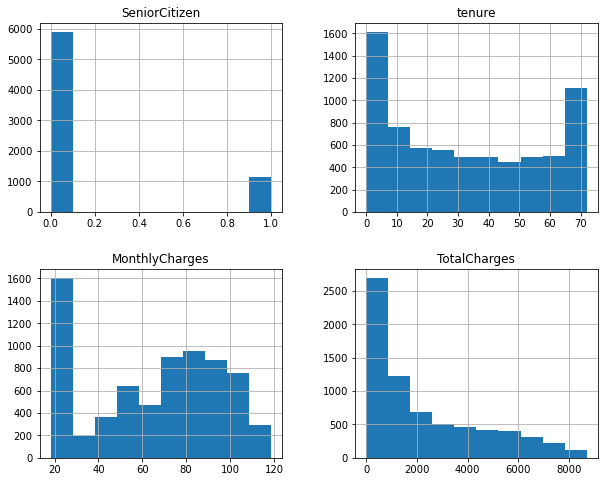

In [11]:
df.hist(bins = 10 , figsize = (10,8))
plt.show()

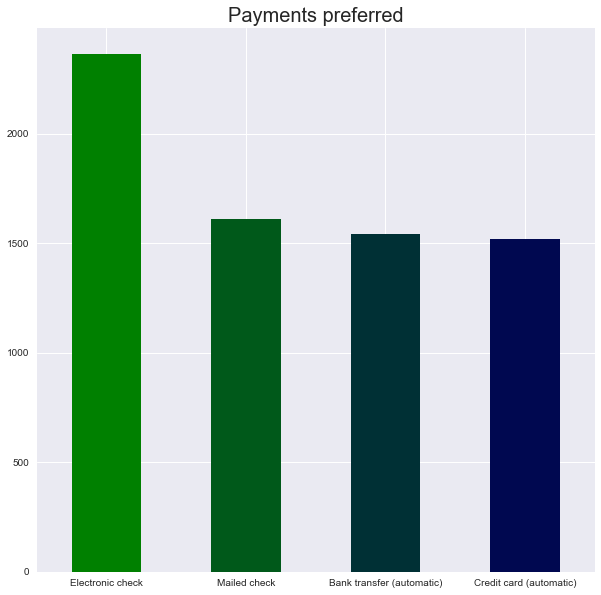

In [12]:
plt.style.use("seaborn")
color=plt.cm.ocean(np.linspace(0,2,20))
df["PaymentMethod"].value_counts().plot.bar(color=color,figsize=(10,10))
plt.title("Payments preferred",fontsize=20)
plt.xticks(rotation=0)
plt.show()

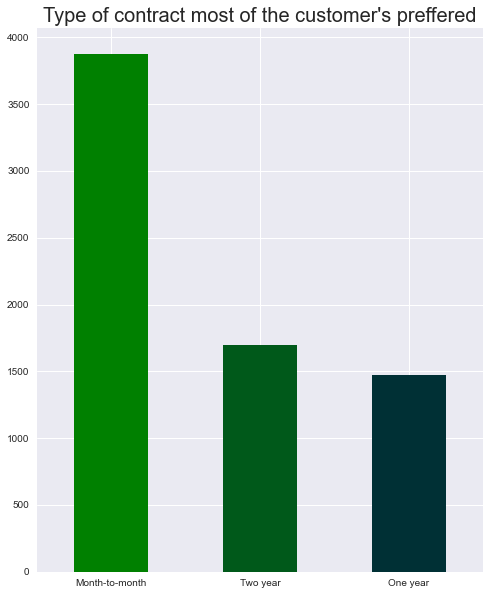

In [13]:
plt.style.use("seaborn")
color=plt.cm.ocean(np.linspace(0,2,20))
df["Contract"].value_counts().plot.bar(color=color,figsize=(8,10))
plt.title("Type of contract most of the customer's preffered",fontsize=20)
plt.xticks(rotation=0)
plt.show()

## Response Variable

<AxesSubplot:ylabel='Churn'>

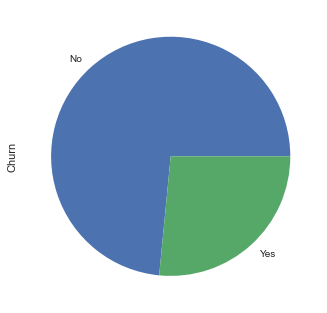

In [14]:
df['Churn'].value_counts().plot.pie()

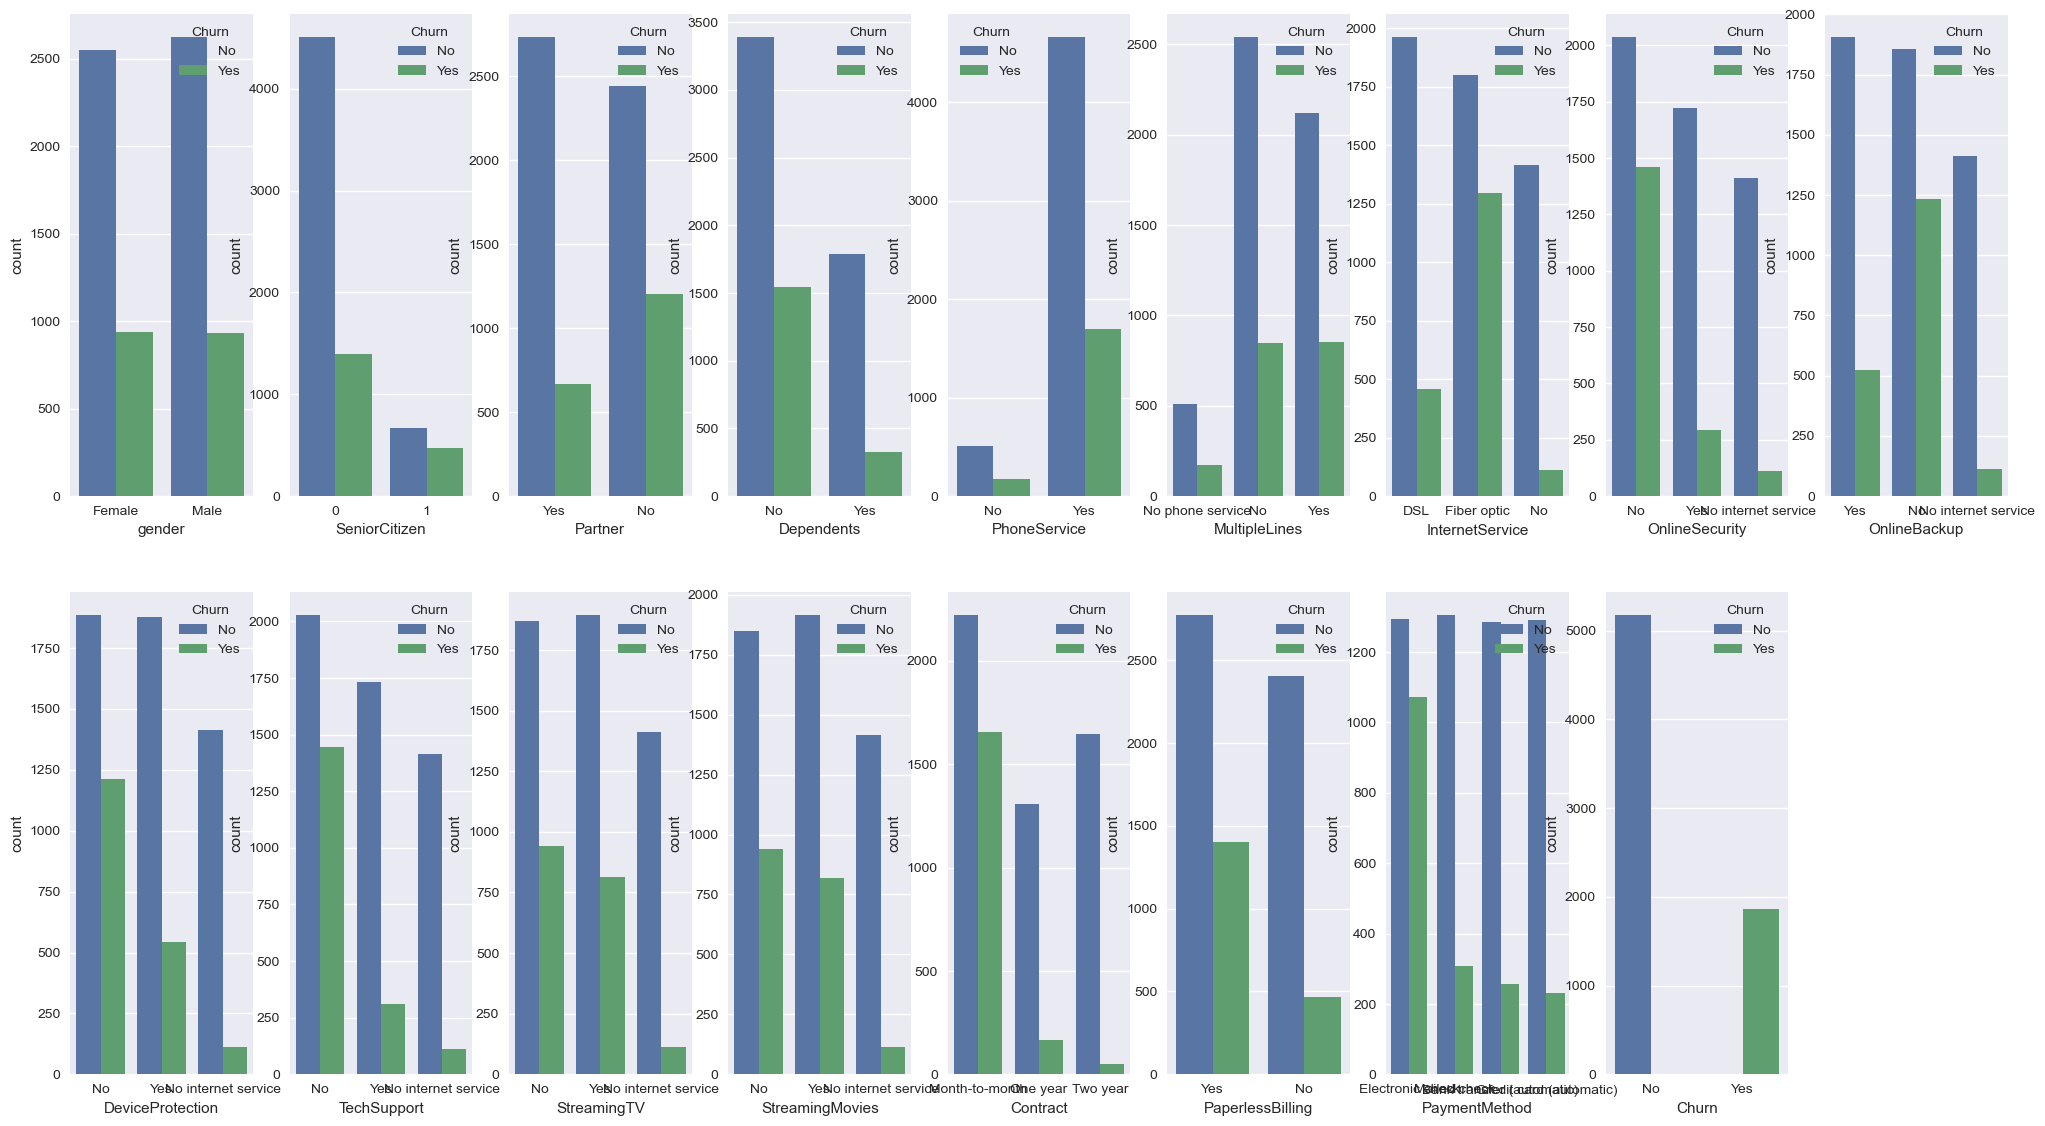

In [15]:
attributes = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                                  'MultipleLines','InternetService',
                                  'OnlineSecurity','OnlineBackup',
                                  'DeviceProtection','TechSupport',
                                  'StreamingTV','StreamingMovies',
                                  'Contract','PaperlessBilling',
                                  'PaymentMethod','Churn']

# plotting countplots 
plt.figure(figsize=(25, 60), dpi=100)
for i, feature in enumerate(attributes):
    plt.subplot(8, 9, i+1)
    sns.countplot(data = df, x = feature, hue='Churn')
    
sns.despine()

#### Customer Churn is to be predicted

### Applying Get Dummies function on Categorical columns

In [16]:
df = pd.get_dummies(df,columns = ['gender','SeniorCitizen','Partner'
                                  ,'Dependents','PhoneService',
                                  'MultipleLines','InternetService',
                                  'OnlineSecurity','OnlineBackup',
                                  'DeviceProtection','TechSupport',
                                  'StreamingTV','StreamingMovies',
                                  'Contract','PaperlessBilling',
                                  'PaymentMethod' , 
                                  'Churn'],drop_first = True)

In [17]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   gender_Male                            7043 non-null   uint8  
 4   SeniorCitizen_1                        7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [19]:
#shape has increased after encoding
df.shape

(7043, 31)

In [20]:
#assigning independent variables to x and dependent variable or response variable to y
x = df.drop('Churn_Yes',axis = 1)
y = df['Churn_Yes']

### Splitting the dataframe into training and testing data

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.30 , random_state = 100)

In [22]:
print("Dimension of x_train :",x_train.shape)
print("Dimension of x_test :",x_test.shape)
print("Dimension of y_train :",y_train.shape)
print("Dimension of y_test :",y_test.shape)

Dimension of x_train : (4930, 30)
Dimension of x_test : (2113, 30)
Dimension of y_train : (4930,)
Dimension of y_test : (2113,)


## Building a Logistic Regression Model

In [23]:
logmodel = lm()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred = logmodel.predict(x_test)

In [25]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [26]:
y_test.head(20)

4880    0
1541    0
1289    0
5745    0
4873    0
4168    0
1557    0
2892    0
664     0
1588    0
1338    1
6000    0
2310    0
3294    1
290     1
2505    0
3171    0
1366    1
6560    0
2420    0
Name: Churn_Yes, dtype: uint8

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1547
           1       0.62      0.51      0.56       566

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



In [28]:
print(confusion_matrix(y_test,pred))

[[1368  179]
 [ 279  287]]


#### 1368 and 287 are correct predictions

In [29]:
accuracy_score(y_test,pred)

0.7832465688594415

#### Accuracy score is 0.78 which can be considered good